# THE SPARK FOUNDATION INTERNSHIP

## Created By:- Sonu Choudhary

# Simple  Linear Regression 

In this task, we have to predict the percentage of marks anticipated by the student based on the number of hours they have studied.

In [2]:
#importing the libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import plotly.express as px

In [3]:
#getting the dataset
url="http://bit.ly/w-data "
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# finding the corellation 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Visualiztion of the dataset


Plotting the dataset in 2d scatter plot for better understanding of data.

In [10]:
fig = px.scatter(df, x="Hours", y="Scores",title='Hours Studied vs Percentage')
fig.show()


# Preparing the data

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  


Splitting the dataset into train and test data using sklearn learn train_ test _split.


In [12]:
#Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the model

Training our model on the test datset.

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

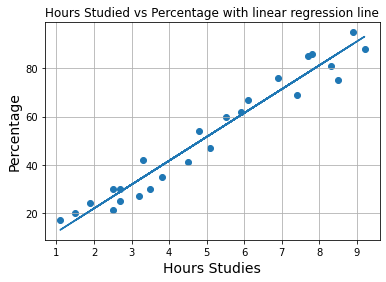

In [14]:
# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.grid(True)
plt.xlabel('Hours Studies', fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.title('Hours Studied vs Percentage with linear regression line')
plt.show()

# Making Predictions

As the model is trained now we make some predictions.

In [15]:
# Testing data - In Hours
print(X_test) 
# Predicting the scores
y_pred = lin_reg.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted Scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
#Predicting the percentage   with our own data
hours = [9.25]
own_pred = lin_reg.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


# Model Evaluation

Evaluating the performance of the algorithm using differernt metrices to check how well it has perform on the dataset.

In [18]:
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
r2_score=r2_score(y_test, y_pred)
print('r2_score Error:',r2_score)
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)


r2_score Error: 0.9454906892105356
Mean Squred Error: 21.5987693072174
Mean absolute Error: 4.183859899002975
